# Using chef in jupyter notebook

To run chef in the notebook, use the `Chef` class from `ddf_utils.chef.api`

In [1]:
import os
import sys
import ruamel.yaml as yaml
from ddf_utils.chef.api import Chef

In [2]:
# at the beginning, initial the chef
chef = Chef()

In [3]:
# adding configs and metadata(to the info section)

(chef.add_config(ddf_dir=os.path.expanduser('~/src/work/Gapminder/datasets'))
     .add_metadata(id='test_dataset', 
                   base=['ddf--transpint--corrupton']))

In [4]:
# adding ingredient, parameters are just like in recipe

i = '''
id: cpi-datapoints
dataset: ddf--transpint--corrupton
key: country, year
value: "*"
'''

d = yaml.round_trip_load(i)
chef.add_ingredient(**d)

In [5]:
# add an other ingredient

chef.add_ingredient(id='bp-datapoints', dataset='ddf--bp--energy', key='geo, year', value='*')

In [6]:
# add procedures, parameters are same as in recipe

chef.add_procedure(collection='datapoints',   # which part of cooking section the procedure is in
                   procedure='translate_header', 
                   ingredients=['bp-datapoints'], 
                   result='bp-datapoints-translate', 
                   options={'dictionary': {'geo': 'country'}})

In [7]:
# add an other procedure

chef.add_procedure(collection='datapoints', 
                   procedure='merge', 
                   ingredients=['bp-datapoints-translate', 'cpi-datapoints'], 
                   result='res')

In [8]:
# you can print the recipe in yaml format

a = chef.to_recipe()

info:
  id: test_dataset
  base:
  - ddf--transpint--corrupton
config:
  ddf_dir: /Users/semio/src/work/Gapminder/datasets
ingredients:
- id: cpi-datapoints
  dataset: ddf--transpint--corrupton
  key: country, year
  values: '*'
- id: bp-datapoints
  dataset: ddf--bp--energy
  key: geo, year
  values: '*'
cooking:
  datapoints:
  - procedure: translate_header
    ingredients:
    - bp-datapoints
    options:
      dictionary:
        geo: country
    result: bp-datapoints-translate
  - procedure: merge
    ingredients:
    - bp-datapoints-translate
    - cpi-datapoints
    result: res


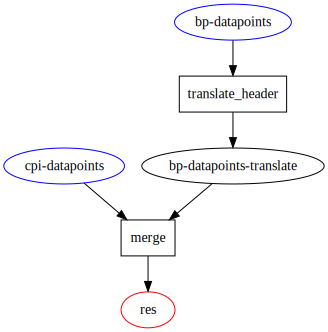

In [9]:
# also in graph

chef.to_graph()

In [10]:
# to run the recipe and get the output:

res = chef.run()

2017-08-21 11:02:51 Chef INFO translate_header: bp-datapoints
2017-08-21 11:02:52 Chef INFO merge: ['bp-datapoints-translate', 'cpi-datapoints']
INFO:Chef:merge: ['bp-datapoints-translate', 'cpi-datapoints']


In [11]:
res

[<ProcedureResult: res>]

In [12]:
res[0].get_data().keys()

dict_keys(['biofuels_production_kboed', 'biofuels_production_ktoe', 'carbon_dioxide_emissions', 'coal_consumption_mtoe', 'coal_production_mtoe', 'coal_production_tonnes', 'electricity_generation', 'gas_consumption_bcf', 'gas_consumption_bcm', 'gas_consumption_tonnes', 'gas_production_bcf', 'gas_production_bcm', 'gas_production_tonnes', 'gas_proved_reserves_history', 'geo_biomass_other_mtoe', 'geo_biomass_other_twh', 'hydro_consumption_mtoe', 'hydro_consumption_twh', 'nuclear_consumption_mtoe', 'nuclear_consumption_twh', 'oil_consumption_barrels', 'oil_consumption_tonnes', 'oil_production_barrels', 'oil_production_tonnes', 'oil_proved_reserves_history', 'oil_refinery_capacities', 'oil_refinery_throughput', 'other_renewables_mtoe', 'other_renewables_twh', 'primary_energy_consumption', 'solar_consumption_mtoe', 'solar_consumption_twh', 'wind_consumption_mtoe', 'wind_consumption_twh', 'cpi'])

In [13]:
res[0].get_data()['biofuels_production_kboed'].sample(5)

,country,year,biofuels_production_kboed
579,spain,1997,0.76882
519,poland,2015,17.70100
839,united_kingdom,1997,0.00000
134,canada,1994,0.00000
434,other_asia_pacific,2008,7.47240


In [14]:
res[0].get_data()['cpi'].sample(5)

,country,year,cpi
404,fyr_macedonia,2010,4.1
1010,mli,2013,28.0
223,sau,2015,52.0
252,bfa,2015,38.0
138,lbn,2014,27.0


In [15]:
# we can also create a Chef instance from existing recipes

recipe_file = '../tests/recipes_pass/test_flatten.yml'
print(open(os.path.abspath(recipe_file)).read())

info:
    id: test-flatten


ingredients:
    - id: kilm-datapoints
      dataset: ddf--ilo--kilm_employment_sector
      key: "country,sex,year"
      value: "*"



cooking:
    datapoints:
        - procedure: filter_row
          ingredients:
              - kilm-datapoints
          result: filtered
          options:
              filters:
                agriculture_thousands:
                    country: afg
                    year:
                        - 1990
                        - 1991
                agriculture_percentage:
                    country:
                        - usa
                        - swe
                    year:
                        - 1990
                        - 1991
                        - 1992
                        - 1993
                        - 1994
                        - 1995
                        - 1996
        - procedure: flatten
          ingredients:
              - filtered
          options:
              dictionary:

In [16]:
chef = Chef.from_recipe(os.path.expandvars(recipe_file),
                        ddf_dir=os.path.expanduser('/Users/semio/src/work/Gapminder/libs/ddf_utils/tests/datasets'))

2017-08-21 11:02:52 Chef WARNING no serve procedure found, will serve the last result: res


In [17]:
chef.to_recipe()

info:
  id: test-flatten
config:
  ddf_dir: /Users/semio/src/work/Gapminder/libs/ddf_utils/tests/datasets
ingredients:
- id: kilm-datapoints
  dataset: ddf--ilo--kilm_employment_sector
  key: country,sex,year
  values: '*'
cooking:
  datapoints:
  - procedure: filter_row
    ingredients:
    - kilm-datapoints
    options:
      filters:
        agriculture_thousands:
          country: afg
          year:
          - 1990
          - 1991
        agriculture_percentage:
          country:
          - usa
          - swe
          year:
          - 1990
          - 1991
          - 1992
          - 1993
          - 1994
          - 1995
          - 1996
    result: filtered
  - procedure: flatten
    ingredients:
    - filtered
    options:
      dictionary:
        agriculture*: '{concept}_{sex}'
      flatten_dimensions:
      - sex
    result: res


In [18]:
res = chef.run()

/Users/semio/src/work/Gapminder/libs/ddf_utils/ddf_utils/chef/procedure.py:489: DeprecationWarning: filter_row is deprecated, please use filter function instead.
  warnings.warn("filter_row is deprecated, please use filter function instead.", category=DeprecationWarning)
2017-08-21 11:02:52 Chef INFO filter_row: kilm-datapoints
INFO:Chef:filter_row: kilm-datapoints
2017-08-21 11:02:52 Chef INFO flatten: filtered
INFO:Chef:flatten: filtered


In [19]:
res[0].get_data().keys()

dict_keys(['agriculture_percentage_f', 'agriculture_percentage_m', 'agriculture_percentage_mf'])

In [20]:
res[0].get_data()['agriculture_percentage_f']

,country,year,agriculture_percentage_f
7344,swe,1990,1.8
7347,swe,1991,1.8
7350,swe,1992,1.9
7353,swe,1993,1.9
7356,swe,1994,1.8
7359,swe,1995,1.7
7362,swe,1996,1.7
8156,usa,1990,1.3
8159,usa,1991,1.3
8162,usa,1992,1.3


# quickly add lots of similar procedures

In [21]:
from ddf_utils.chef.helpers import gen_sym

In [22]:
chef = Chef()

In [23]:
chef.add_config(ddf_dir=os.path.expanduser('~/src/work/Gapminder/datasets'))

In [24]:
chef.add_ingredient(id='population_by_age_dps', 
                    dataset='ddf--unpop--wpp_population_semio',
                    key='country_code,year,age',
                    value=['population'])

In [25]:
collection = 'datapoints'


groups = [list(map(str, range(0, 5))),
          list(map(str, range(5, 10))),
          list(map(str, range(10, 20)))
         ]

names = ['population_0_4', 'population_5_9', 'population_10_19']

ingredients_0 = ['population_by_age_dps']

to_merge = []

for g, n in zip(groups, names):
    
    procedure = 'filter_row'
    options = {
        'filters': {
            'population': {
                'age': g}}}
    result = gen_sym('filter_row', ingredients_0, options)

        
    chef.add_procedure(collection=collection,
                       procedure=procedure,
                       ingredients=ingredients_0,
                       options=options,
                       result=result
                      )
    
    ingredients = [result]
    procedure = 'groupby'
    options = {
        'groupby': ['country_code', 'year'],
        'aggregate': {'population': 'sum'}
    }
    result = gen_sym(procedure, ingredients, options)
    
    chef.add_procedure(collection=collection,
                       procedure=procedure,
                       ingredients=ingredients,
                       options=options,
                       result=result
                      )
    
    ingredients = [result]
    procedure = 'translate_header'
    options = {
        'dictionary': {
            'population': n
        }
    }
    result = gen_sym(procedure, ingredients, options)

    chef.add_procedure(collection=collection,
                   procedure=procedure,
                   ingredients=ingredients,
                   options=options,
                   result=result
                  )
    to_merge.append(result)

In [26]:
chef.add_procedure(collection=collection,
                   procedure='merge',
                   ingredients=to_merge,
                   result='result'
                  )

In [27]:
chef.to_recipe()

info: {}
config:
  ddf_dir: /Users/semio/src/work/Gapminder/datasets
ingredients:
- id: population_by_age_dps
  dataset: ddf--unpop--wpp_population_semio
  key: country_code,year,age
  values:
  - population
cooking:
  datapoints:
  - procedure: filter_row
    ingredients: &id001
    - population_by_age_dps
    options:
      filters:
        population:
          age:
          - '0'
          - '1'
          - '2'
          - '3'
          - '4'
    result: filter_row_477cc3
  - procedure: groupby
    ingredients:
    - filter_row_477cc3
    options:
      groupby:
      - country_code
      - year
      aggregate:
        population: sum
    result: groupby_002756
  - procedure: translate_header
    ingredients:
    - groupby_002756
    options:
      dictionary:
        population: population_0_4
    result: translate_header_3fb5b2
  - procedure: filter_row
    ingredients: *id001
    options:
      filters:
        population:
          age:
          - '5'
          - '6'
       

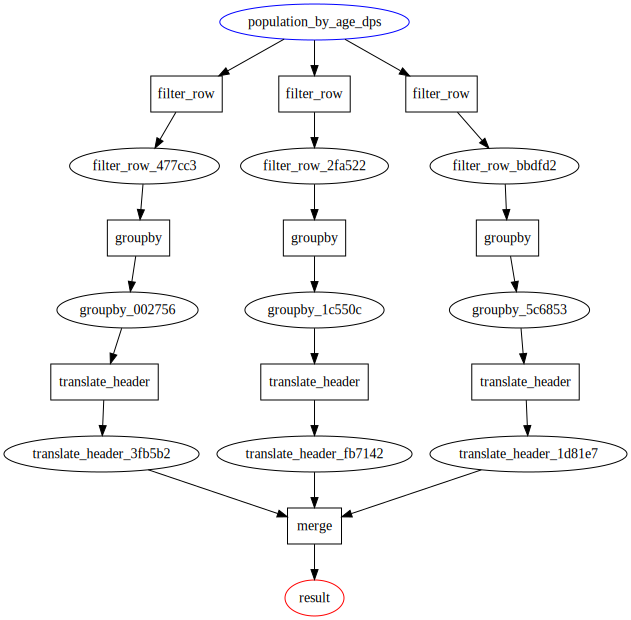

In [28]:
chef.to_graph()

In [29]:
res = chef.run()

2017-08-21 11:02:53 Chef INFO groupby: filter_row_477cc3
INFO:Chef:groupby: filter_row_477cc3
/Users/semio/src/work/Gapminder/libs/ddf_utils/ddf_utils/chef/procedure.py:489: DeprecationWarning: filter_row is deprecated, please use filter function instead.
  warnings.warn("filter_row is deprecated, please use filter function instead.", category=DeprecationWarning)
2017-08-21 11:02:53 Chef INFO filter_row: population_by_age_dps
INFO:Chef:filter_row: population_by_age_dps
2017-08-21 11:03:07 Chef INFO translate_header: groupby_002756
INFO:Chef:translate_header: groupby_002756
2017-08-21 11:03:07 Chef INFO groupby: filter_row_2fa522
INFO:Chef:groupby: filter_row_2fa522
/Users/semio/src/work/Gapminder/libs/ddf_utils/ddf_utils/chef/procedure.py:489: DeprecationWarning: filter_row is deprecated, please use filter function instead.
  warnings.warn("filter_row is deprecated, please use filter function instead.", category=DeprecationWarning)
2017-08-21 11:03:07 Chef INFO filter_row: population_b

In [30]:
res

[<ProcedureResult: result>]

In [31]:
res[0].get_data().keys()

dict_keys(['population_0_4', 'population_5_9', 'population_10_19'])

# Error handling

In [32]:
chef = Chef()

In [33]:
i = '''
id: cpi-datapoints
dataset: ddf--transpint--corrupton
key: country, year
value: "*"
snieot: 'soneot'
'''

d = yaml.round_trip_load(i)
chef.add_ingredient(**d)

2017-08-21 11:03:09 Chef WARNING no ddf_dir in config, assuming current working dir


In [34]:
i = '''
id: cpi-datapoints_
dataset: ddf--transpint--corrupton
oh_my_interesting_key: country, year   # error
value: "*"
'''

d = yaml.round_trip_load(i)

try:
    chef.add_ingredient(**d)
except KeyError as e:
    print(str(e))

2017-08-21 11:03:09 Chef WARNING no ddf_dir in config, assuming current working dir


'Field "key" is mandatory. Please provide this field in the options.'


In [35]:
i = '''
procedure: my_new_procedure
ingredients:
    - testing
options:
    opt: val
result: result
'''

d = yaml.round_trip_load(i)
chef.add_procedure('datapoints', **d)

# Advance usage: create new procedure

will add description later

In [36]:
from ddf_utils.chef.ingredient import Ingredient, ProcedureResult

In [49]:
def multiply_1000(chef, ingredients, result, **options):
    ingredients = [chef.dag.get_node(x) for x in ingredients]
    ingredient = ingredients[0].evaluate()
    
    new_data = dict()
    for k, df in ingredient.get_data().items():
        df_ = df.copy()
        df_[k] = df_[k] * 1000
        new_data[k] = df_
        
    return ProcedureResult(chef, result, ingredient.key, new_data)

In [50]:
chef = Chef()
chef.add_config(ddf_dir=os.path.expanduser('~/src/work/Gapminder/datasets'))

In [51]:
i = '''
id: cpi-datapoints
dataset: ddf--transpint--corrupton
key: country, year
value: "*"
'''

d = yaml.round_trip_load(i)
chef.add_ingredient(**d)

In [52]:
chef.register_procedure(multiply_1000)

In [53]:
chef.add_procedure(collection='datapoints',
                   procedure='multiply_1000',
                   result='res',
                   ingredients=['cpi-datapoints']
                  )

In [54]:
res = chef.run()

In [55]:
res[0].get_data()['cpi'].head(5)

,country,year,cpi
0,dnk,2014,92000.0
1,nzl,2014,91000.0
2,fin,2014,89000.0
3,swe,2014,87000.0
4,nor,2014,86000.0


In [56]:
chef.ingredients

[<Ingredient: cpi-datapoints>]

In [57]:
chef.ingredients[0].get_data()['cpi'].head()  # the original

,country,year,cpi
0,dnk,2014,92.0
1,nzl,2014,91.0
2,fin,2014,89.0
3,swe,2014,87.0
4,nor,2014,86.0


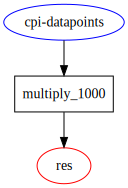

In [58]:
chef.to_graph()